In [2]:
import torch
import numpy as np

In [3]:
from torchvision import datasets
import torchvision.transforms

num_workers = 0
batch_size = 64
transform = torchvision.transforms.ToTensor()

train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


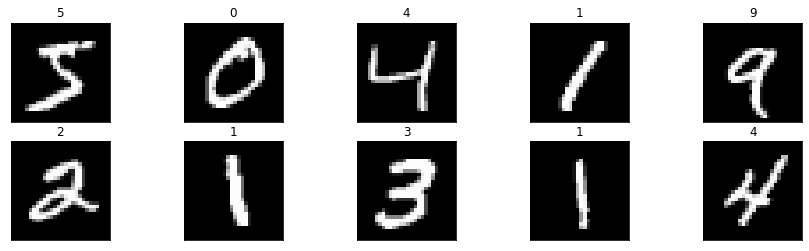

In [7]:
import matplotlib.pyplot as plt
    
images, labels = iter(train_loader).next()
images = images.numpy()

fig = plt.figure(figsize=(15, 4))
for i in np.arange(10):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[i]), cmap='gray')
    ax.set_title(str(labels[i].item()))

In [14]:
#images[1].shape

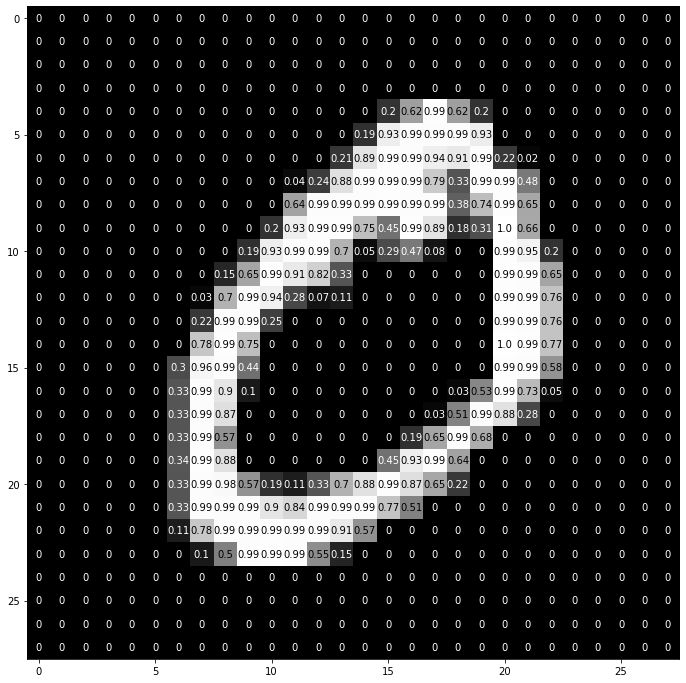

In [15]:
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot()
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x), horizontalalignment='center', verticalalignment='center', color='white' if img[x][y]<thresh else 'black')

In [17]:
import torch.nn as nn
import torch.nn.functional as F

# we are defining the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256,64)
        self.fc3 = nn.Linear(64,10)
        self.drop = nn.Dropout(p=0.2)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # flatten image input
        x = self.drop(F.relu(self.fc1(x)))  # add hidden layer
        x = self.drop(F.relu(self.fc2(x)))  # with relu activation function
        x = self.fc3(x)
        return x

model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (drop): Dropout(p=0.2, inplace=False)
)


In [18]:
criterion = nn.CrossEntropyLoss()  #loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [19]:
from tqdm.notebook import tqdm
n_epochs = 10

model.train()

for epoch in tqdm(range(n_epochs)):
    train_loss = 0.0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)
        
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1, 
        train_loss
        ))

Epoch: 1 	Training Loss: 0.373570
Epoch: 2 	Training Loss: 0.162708
Epoch: 3 	Training Loss: 0.114903
Epoch: 4 	Training Loss: 0.091459
Epoch: 5 	Training Loss: 0.076125
Epoch: 6 	Training Loss: 0.064298
Epoch: 7 	Training Loss: 0.058085
Epoch: 8 	Training Loss: 0.051700
Epoch: 9 	Training Loss: 0.046352
Epoch: 10 	Training Loss: 0.042084



In [21]:
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in test_loader:
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item()*data.size(0)
 
    _, pred = torch.max(output, 1)
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))

    for i in range(len(target)):
        label = target.data[i].item()
        class_correct[label] += correct[i].item()
        class_total[label] += 1

test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            class_correct[i], class_total[i]))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.074025

Test Accuracy of     0: 99% (974/980)
Test Accuracy of     1: 99% (1128/1135)
Test Accuracy of     2: 97% (1011/1032)
Test Accuracy of     3: 96% (979/1010)
Test Accuracy of     4: 98% (964/982)
Test Accuracy of     5: 98% (878/892)
Test Accuracy of     6: 96% (928/958)
Test Accuracy of     7: 98% (1011/1028)
Test Accuracy of     8: 95% (932/974)
Test Accuracy of     9: 97% (986/1009)

Test Accuracy (Overall): 97% (9791/10000)


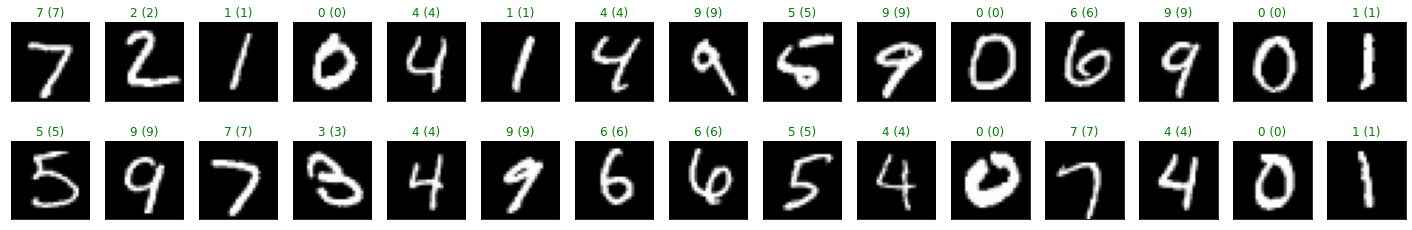

In [24]:
images, labels = iter(test_loader).next()

output = model(images)
_, preds = torch.max(output, 1)
images = images.numpy()

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(30):
    ax = fig.add_subplot(2, 15, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))